In [20]:
import importlib, sys
def ensure(pkg):
    try:
        importlib.import_module(pkg)
        print(f"{pkg} available")
    except ImportError:
        print(f"{pkg} missing — installing via pip.")
        !{sys.executable} -m pip install {pkg}

for p in ['pandas','numpy','matplotlib','seaborn','xgboost','scikit-learn','joblib']:
    ensure(p)


pandas available
numpy available
matplotlib available
seaborn available
xgboost available
scikit-learn missing — installing via pip.
zsh:1: no such file or directory: /Users/adityapatil/Documents/Fall-25/CSE572/Project
joblib available


In [21]:
import pandas as pd
df = pd.read_csv("../data/train.csv")
print("Columns in the Dataset:")
print(df.columns.tolist())
print("Shape:", df.shape)
df.head()


Columns in the Dataset:
['id', 'Age', 'Gender', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Education Level', 'Occupation', 'Health Score', 'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Premium Amount']
Shape: (1200000, 21)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [22]:
print("\nData Information:")
df.info()

print("\nAll the Missing values per column:")
display(df.isnull().sum())

print("\nDuplicate Rows  here:", df.duplicated().sum())

print("\nNumerical Summary Statistics data:")
display(df.describe())

cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\nUnique value counts for {col}:")
    display(df[col].value_counts())



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Durat

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64


Duplicate Rows  here: 0

Numerical Summary Statistics data:


,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03



Unique value counts for Gender:


Gender
Male      602571
Female    597429
Name: count, dtype: int64


Unique value counts for Marital Status:


Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64


Unique value counts for Education Level:


Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64


Unique value counts for Occupation:


Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64


Unique value counts for Location:


Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64


Unique value counts for Policy Type:


Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64


Unique value counts for Policy Start Date:


Policy Start Date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:39.134960    134
2023-11-02 15:21:39.134960    118
                             ... 
2021-06-07 15:21:39.104139      1
2024-07-19 15:21:39.233998      1
2019-12-14 15:21:39.110557      1
2020-07-23 15:21:39.217387      1
2020-10-19 15:21:39.118178      1
Name: count, Length: 167381, dtype: int64


Unique value counts for Customer Feedback:


Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64


Unique value counts for Smoking Status:


Smoking Status
Yes    601873
No     598127
Name: count, dtype: int64


Unique value counts for Exercise Frequency:


Exercise Frequency
Weekly     306179
Monthly    299830
Rarely     299420
Daily      294571
Name: count, dtype: int64


Unique value counts for Property Type:


Property Type
House        400349
Apartment    399978
Condo        399673
Name: count, dtype: int64

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [24]:
num_target_cols = ['Premium Amount']       # numeric target
cat_target_cols = ['Policy Type']          # categorical target

feature_cols = [c for c in df.columns if c not in num_target_cols + cat_target_cols + ['id','Policy Start Date']]

X = df[feature_cols]
y_num = df[num_target_cols]
y_cat = df[cat_target_cols]

print("Feature Columns here:", X.columns.tolist())
print("Numeric Targets here:", num_target_cols)
print("Categorical Targets here:", cat_target_cols)


Feature Columns here: ['Age', 'Gender', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Education Level', 'Occupation', 'Health Score', 'Location', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
Numeric Targets here: ['Premium Amount']
Categorical Targets here: ['Policy Type']


In [25]:
X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.preprocessing import LabelEncoder
cat_target_encoders = {}
for col in y_cat.columns:
    le = LabelEncoder()
    y_cat[col] = le.fit_transform(y_cat[col])
    cat_target_encoders[col] = le


/var/folders/tz/mkd7_f011yb8zc42kdvw43hw0000gn/T/ipykernel_2091/1837073148.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_cat[col] = le.fit_transform(y_cat[col])


In [26]:
from sklearn.model_selection import train_test_split

y_all = pd.concat([y_num, y_cat], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_all, test_size=0.2, random_state=42)

y_num_train = y_train[y_num.columns]
y_num_test = y_test[y_num.columns]
y_cat_train = y_train[y_cat.columns]
y_cat_test = y_test[y_cat.columns]


In [27]:
from xgboost import XGBRegressor, XGBClassifier
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier

xgb_reg = MultiOutputRegressor(
    XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
)
xgb_reg.fit(X_train, y_num_train)
print("Numeric Target model is trained.")

xgb_clf = MultiOutputClassifier(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, random_state=42)
)
xgb_clf.fit(X_train, y_cat_train)
print("Categorical Target model is trained.")


Numeric Target model is trained.


/Users/adityapatil/Documents/Fall-25/CSE572/Project Checkpoint 1/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:38:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Categorical Target model is trained.


In [28]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

y_num_pred = xgb_reg.predict(X_test)
y_num_pred = np.atleast_2d(y_num_pred)
print("\nNumeric Prediction for first 5 rows:")
print(y_num_pred[:5])

print("\nNumeric Targets Evaluation -:")
for i, col in enumerate(y_num_test.columns):
    pred_col = y_num_pred[:, i] if y_num_pred.shape[1] > 1 else y_num_pred.ravel()
    mse_col = mean_squared_error(y_num_test[col], pred_col)
    r2_col = r2_score(y_num_test[col], pred_col)
    print(f"{col}: MSE={mse_col:.4f}, R2={r2_col:.4f}")

y_cat_pred = xgb_clf.predict(X_test)
y_cat_pred = np.atleast_2d(y_cat_pred)
print("\nCategorical Predictions for first 5 rows:")
print(y_cat_pred[:5])

print("\nCategorical Targets Evaluation -- :")
for i, col in enumerate(y_cat_test.columns):
    pred_col = y_cat_pred[:, i] if y_cat_pred.shape[1] > 1 else y_cat_pred.ravel()
    acc_col = accuracy_score(y_cat_test[col], pred_col)
    print(f"{col}: Accuracy={acc_col:.4f}")



Numeric Prediction for first 5 rows:
[[1181.1019]
 [1220.8628]
 [1170.687 ]
 [ 972.6232]
 [1208.7125]]

Numeric Targets Evaluation -:
Premium Amount: MSE=718675.1768, R2=0.0383

Categorical Predictions for first 5 rows:
[[2]
 [0]
 [2]
 [1]
 [1]]

Categorical Targets Evaluation -- :
Policy Type: Accuracy=0.3360


In [29]:
import joblib

joblib.dump(xgb_reg, "xgb_numeric_model.pkl")
joblib.dump(xgb_clf, "xgb_categorical_model.pkl")
print("Models are SAVED.")


Models are SAVED.


In [30]:
from sklearn.metrics import average_precision_score

if y_cat_pred.shape[1] == 1:
    y_true_bin = pd.get_dummies(y_cat_test)
    y_pred_bin = pd.get_dummies(pd.DataFrame(y_cat_pred, columns=y_cat_test.columns))
else:
    y_true_bin = y_cat_test
    y_pred_bin = pd.DataFrame(y_cat_pred, columns=y_cat_test.columns)

map_score = average_precision_score(y_true_bin, y_pred_bin)
print(f"\nMean Average Precision (MAP) : {map_score:.4f}")



Mean Average Precision (MAP) : 0.3299


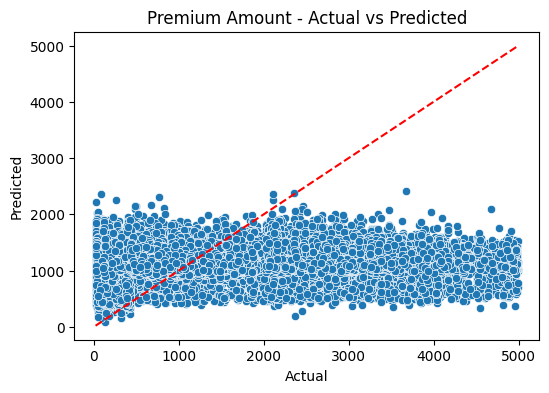

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
for i, col in enumerate(y_num_test.columns):
    pred_col = y_num_pred[:, i] if y_num_pred.shape[1] > 1 else y_num_pred.ravel()
    df_compare = pd.DataFrame({
        "Actual": y_num_test[col].values,
        "Predicted": pred_col
    })
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="Actual", y="Predicted", data=df_compare)
    plt.title(f"{col} - Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot([df_compare["Actual"].min(), df_compare["Actual"].max()],
             [df_compare["Actual"].min(), df_compare["Actual"].max()],
             color='red', linestyle='--')  # ideal line
    plt.show()


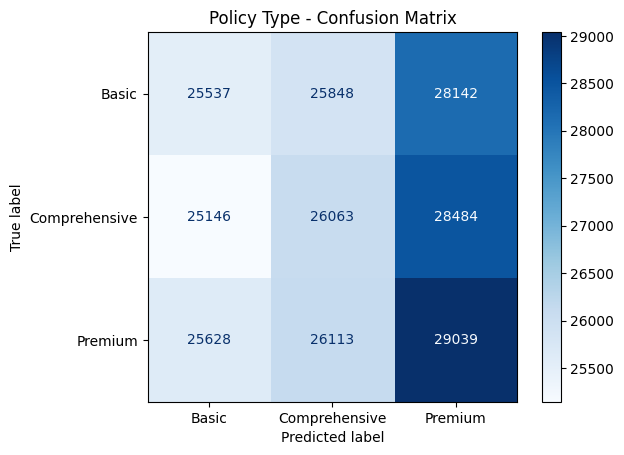

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for i, col in enumerate(y_cat_test.columns):
    pred_col = y_cat_pred[:, i] if y_cat_pred.shape[1] > 1 else y_cat_pred.ravel()
    cm = confusion_matrix(y_cat_test[col], pred_col)
    disp = ConfusionMatrixDisplay(cm, display_labels=cat_target_encoders[col].classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{col} - Confusion Matrix")
    plt.show()